### Objective
- Use linear regression on insurance clients' data to predict insurance premiums for new clients

Load and pre-process data

In [324]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [325]:
# Import the data
insurance_data = pd.read_csv("insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [326]:
# Check shape, data type
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [327]:
# Check missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [328]:
# Remove any duplicate entries
insurance_data.drop_duplicates(inplace=True)

In [329]:
# Encode categorical columns in order to use in model
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()
label_encoder_region = LabelEncoder()

insurance_data["sex"] = label_encoder_sex.fit_transform(insurance_data["sex"])
insurance_data["smoker"] = label_encoder_smoker.fit_transform(insurance_data["smoker"])
insurance_data["region"] = label_encoder_region.fit_transform(insurance_data["region"])

In [330]:
# Get descriptive statistics for all columns
insurance_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


#### Quick scan of our features using a correlation heatmap

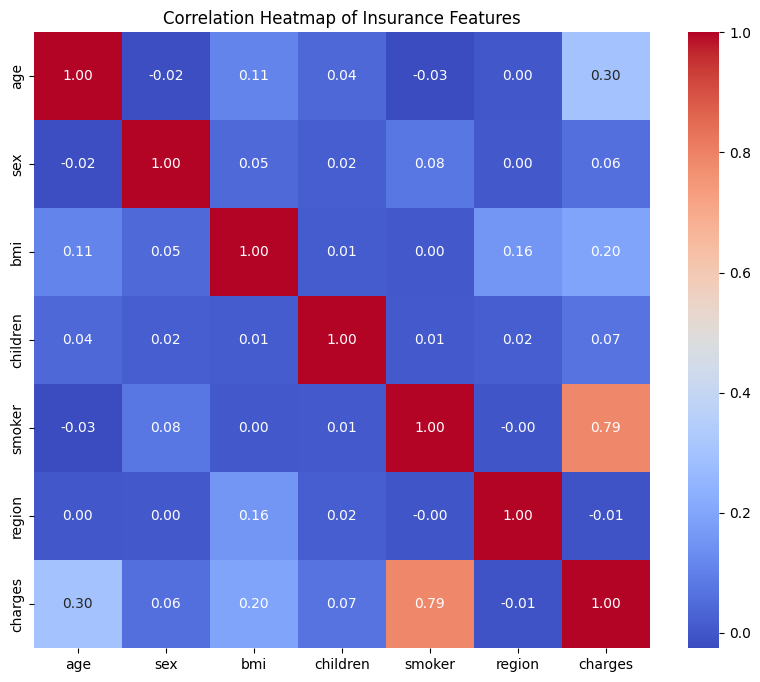

In [331]:
# Compute the correlation matrix
correlation_matrix = insurance_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Insurance Features")
plt.show()

- We can see that there is a high correlation between the number of children that a client has and whether the client is a smoker or not and the insurance charge.
- We also see a low correlation between region, bmi, sex and the insurance charge

#### Feature selection. Train/Test Split. Fit Model

In [332]:
# Feature selection
X = insurance_data.drop("charges", axis=1)
y = insurance_data["charges"]

In [333]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [334]:
# Fit the regression model
insurance_data_model = LinearRegression()
insurance_data_model.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation

In [335]:
# Evaluate the model
y_pred = insurance_data_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 35493102.61
R² Score: 0.81


- An R-squared of 0.78 indicates that the model has good explanatory power — it's capturing most of the underlying pattern in the data. 78% of the variation in Y is explained by the model.

In [336]:
# Insurance charge prediction for a new client
# You may change inputs to get premium
new_client = pd.DataFrame(
    [
        {
            "age": 26,
            "sex": label_encoder_sex.transform(["male"])[0],
            "bmi": 25.3,
            "children": 0,
            "smoker": label_encoder_smoker.transform(["no"])[0],
            "region": label_encoder_region.transform(["southwest"])[0],
        }
    ]
)

predicted_insurance_charge = insurance_data_model.predict(new_client)
print(f"Predicted insurance charge: ZAR{predicted_insurance_charge[0]:.2f}")

Predicted insurance charge: ZAR2516.62
